In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt

In [2]:
NL_t = 0.4
NL_c = 0.01
NL_L = 1.8
NL_mu = 0.3

# Me = 511005.0
Me = 938.272045e6
# ke = 100*1.0e6
ke = 2.5*1.0e6
energy = ke+Me
freq = 30*1.0e6

g = energy/Me
bg = np.sqrt(g**2-1.0)
vec = bg/g*impact.data.clight

emitN = 6.066503e-6

turns = 100
npt = 64

alfaEntrance = np.tan(np.pi*NL_mu)
betaEntrance = NL_L/np.sin(2.0*np.pi*NL_mu)

# Prepare beam & lattice

In [3]:
beam = impact.getBeam()
beam.current = 0.0
beam.kinetic_energy = ke
beam.mass = Me
beam.charge = -1.0
beam.frequency = freq
beam.nCore_y = 1
beam.nCore_z = 1
beam.n_particles = npt

In [4]:
beam.distribution.distribution_type = 'IOTA_Waterbag'
beam.distribution.NL_t = NL_t
beam.distribution.NL_c = NL_c
beam.distribution.betx  = betaEntrance
beam.distribution.alfx  = alfaEntrance
beam.distribution.emitx = emitN
beam.distribution.betz  = 200
beam.distribution.alfz  = 0.0
beam.distribution.emitz = (0.1*ke*1.0e-6)**2*beam.distribution.betz
# beam.distribution.offsetpz = 0.1*energy*1.0e-6

In [5]:
lattice = [impact.getElem('loop'),impact.getElem('nonlinear_insert'),impact.getElem('linear_matrix_map')] 
lattice[0].turns=turns
lattice[1].length = NL_L
lattice[1].strength_t = NL_t
lattice[1].transverse_scale_c = NL_c
lattice[1].tune_advance = NL_mu
lattice[1].n_sckick = 100
lattice[2].nonlinear_insert_length = NL_L
lattice[2].nonlinear_insert_tuneAdvance = NL_mu

writePdata = impact.getElem('write_raw_ptcl')
writePdata.file_id=10
writePdata.turn=1
lattice.insert(1,writePdata)

writePdata1 = impact.getElem('write_raw_ptcl')
writePdata1.file_id=11
writePdata1.turn=turns
lattice.append(writePdata1)

elemTBT = impact.getElem('TBT_integral')
elemTBT.strength_t = NL_t
elemTBT.transverse_scale_c = NL_c
elemTBT.betx = betaEntrance
elemTBT.alfx = alfaEntrance
elemTBT.file_id = 10

elemTBT_old = impact.getElem('TBT_integral_onMomentum')
elemTBT_old.strength_t = NL_t
elemTBT_old.transverse_scale_c = NL_c
elemTBT_old.betx = betaEntrance
elemTBT_old.alfx = alfaEntrance
elemTBT_old.file_id = 10

lattice.append(elemTBT)
lattice.append(elemTBT_old)

# run

In [6]:
impact.writeInputFile(beam,lattice)
impact.run(beam)

0

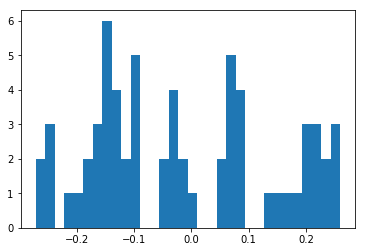

In [7]:
pData = impact.readParticleData(10,ke,beam.mass,freq)
plt.hist(pData[:,5]/ke,bins=32);

In [8]:
ind,TBT_old = impact.readTBT_integral_onMomentum(10)
ind,TBT = impact.readTBT_integral(10)

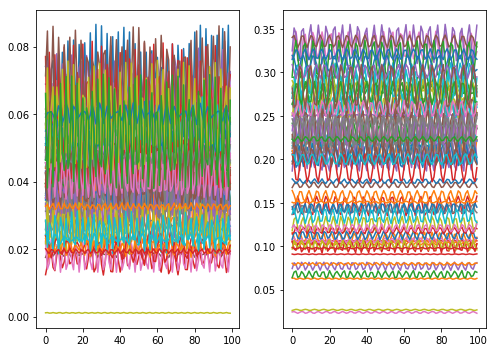

In [9]:
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
for i in range(npt):
    plt.plot(TBT_old[:,0,i])
plt.subplot(1,2,2)
for i in range(npt):
    plt.plot(TBT_old[:,1,i])
plt.tight_layout()

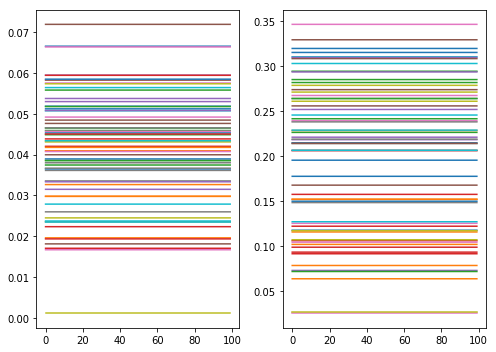

In [10]:
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
for i in range(npt):
    plt.plot(TBT[:,0,i])
plt.subplot(1,2,2)
for i in range(npt):
    plt.plot(TBT[:,1,i])
plt.tight_layout()

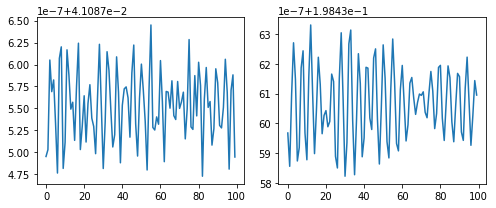

In [11]:
f81 = np.loadtxt('fort.81')
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.plot(f81[:,1])
plt.subplot(1,2,2)
plt.plot(f81[:,2])
plt.tight_layout()

In [12]:
print(f81[-1,1],f81[-1,2])

0.0410874944769 0.198436094983
